# Import Data

In [ ]:
! pip install scikit-learn --upgrade # load newest version of sklearn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import seed
seed(5074)
import tensorflow
tensorflow.random.set_seed(5074)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

# Read the data
#data2019= pd.read_csv("worldhappiness2019.csv")
#predict_2019= pd.read_csv("worldhappiness2019predictions.csv")
data = pd.read_csv("2019.csv")
regiondata= pd.read_csv("region_data.csv")
data.head()
regiondata.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,?land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


# Package Import

In [ ]:
from matplotlib import pyplot
from numpy import loadtxt
from scipy import stats
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Import

In [ ]:
hap_data = pd.read_csv("worldhappiness2019.csv")
hap_data["region"] = np.nan

hap_data_test = pd.read_csv("worldhappiness2019predictions.csv")
hap_data_test["region"] = np.nan

reg_data = pd.read_excel("region_data.xlsx")
reg_data["name_coded"] = np.nan




In [ ]:
hap_data.head()

,Happiness_level,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,region
0,Very High,Finland,1.340,1.587,0.986,0.596,0.153,0.393,NaN
1,Very High,Denmark,1.383,1.573,0.996,0.592,0.252,0.410,NaN
2,Very High,Norway,1.488,1.582,1.028,0.603,0.271,0.341,NaN
3,Very High,Iceland,1.380,1.624,1.026,0.591,0.354,0.118,NaN
4,Very High,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,NaN


In [ ]:
reg_data.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,name_coded
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN,NaN


In [ ]:
pos = 0
for x in hap_data["Happiness_level"]:
    if x == "Very High":
        hap_data["Happiness_level"][pos] = int(5)
    elif x == "High":
        hap_data["Happiness_level"][pos] = int(4)
    elif x == "Average":
        hap_data["Happiness_level"][pos] = int(3)
    elif x == "Low":
        hap_data["Happiness_level"][pos] = int(2)
    elif x =="Very Low":
        hap_data["Happiness_level"][pos] = int(1)
        
    pos+=1

hap_data.Happiness_level = hap_data.Happiness_level.astype(float)

In [ ]:
d = dict()

for reg in reg_data["region"]:
    
    if reg in d:
        d[reg] = d[reg]+1
    else:
        d[reg] = 1
        

# Explore bivariate results

In [ ]:
# this shows the relationship between each region and the region number
d

{'Africa': 60, 'Americas': 57, 'Asia': 51, 'Europe': 51, 'Oceania': 29, nan: 1}

In [ ]:
control = hap_data["Happiness_level"]
indep_var = hap_data.drop(['Happiness_level', 'Country or region'], axis=1)

columns = []
for col in indep_var.columns:
    columns.append(col)

In [ ]:
#for x in columns:
    
 #   print("Happiness level vs", x)
    
  #  if x == "region":
      #  print("\nRegion Keys:", d)
   # sns.boxplot(control, indep_var[x])
    #plt.title("Box Plot of Happiness Level vs " + str(x))
    #plt.ylabel(x)
    #plt.xlabel("Happiness Level")
    #plt.show()
    

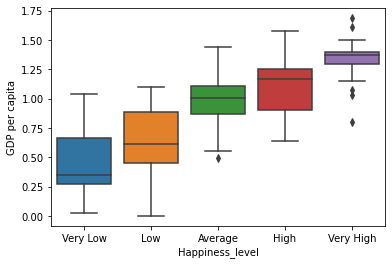

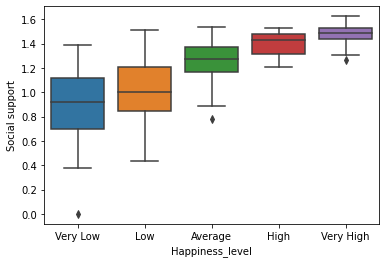

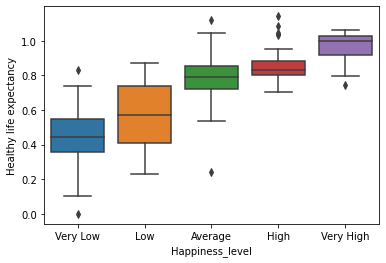

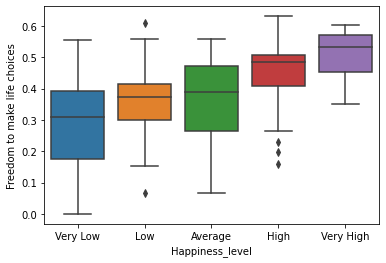

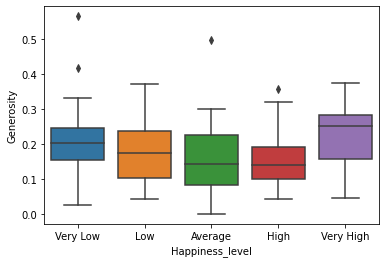

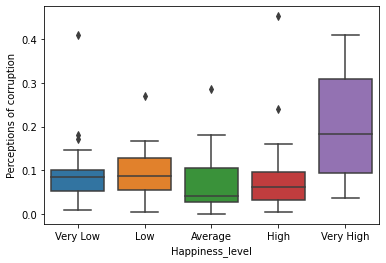

In [ ]:
features = ['GDP per capita','Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
for feature in features:
    ax = sns.boxplot(x='Happiness_level', y=feature, 
                     data=hap_data, 
                     order=['Very Low', 'Low', 'Average', 'High', 'Very High'])
    plt.show()

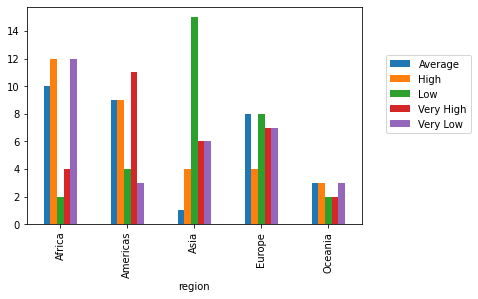

In [ ]:
df = pd.crosstab(region_data['region'], hap_data['Happiness_level'])

ax = df.plot.bar()
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), ncol=1)

plt.show()

## Explore bivariate results
There are noticable key observations on the relationships between the target variable, "Happiness Level", and many of the other variables.

There is a clear relationship that as the GDP per capita increases, the happiness level increases. A similar trend as the aforementioned one is that between the social support and the happiness level of the country. There is also a clear trend that life expectancy increases as happiness level increases.

Generosity and Perceptions of corruption seem to have no clear correlation with happiness level from the box plots. Although it is interesting to find that countries with 'very high' level of happiness show a slightly higher perceptions of corruption, the variation of this observation is relatively high.

By region, Americas showed very high level of the perceived happiness, whereas Africa had the lowest level of the perceived happiness. It is interesting to note that Asia has high percentage of perceived unhappiness, as the responses of "very low" and "low"  are prevalent in the happiness scale. 

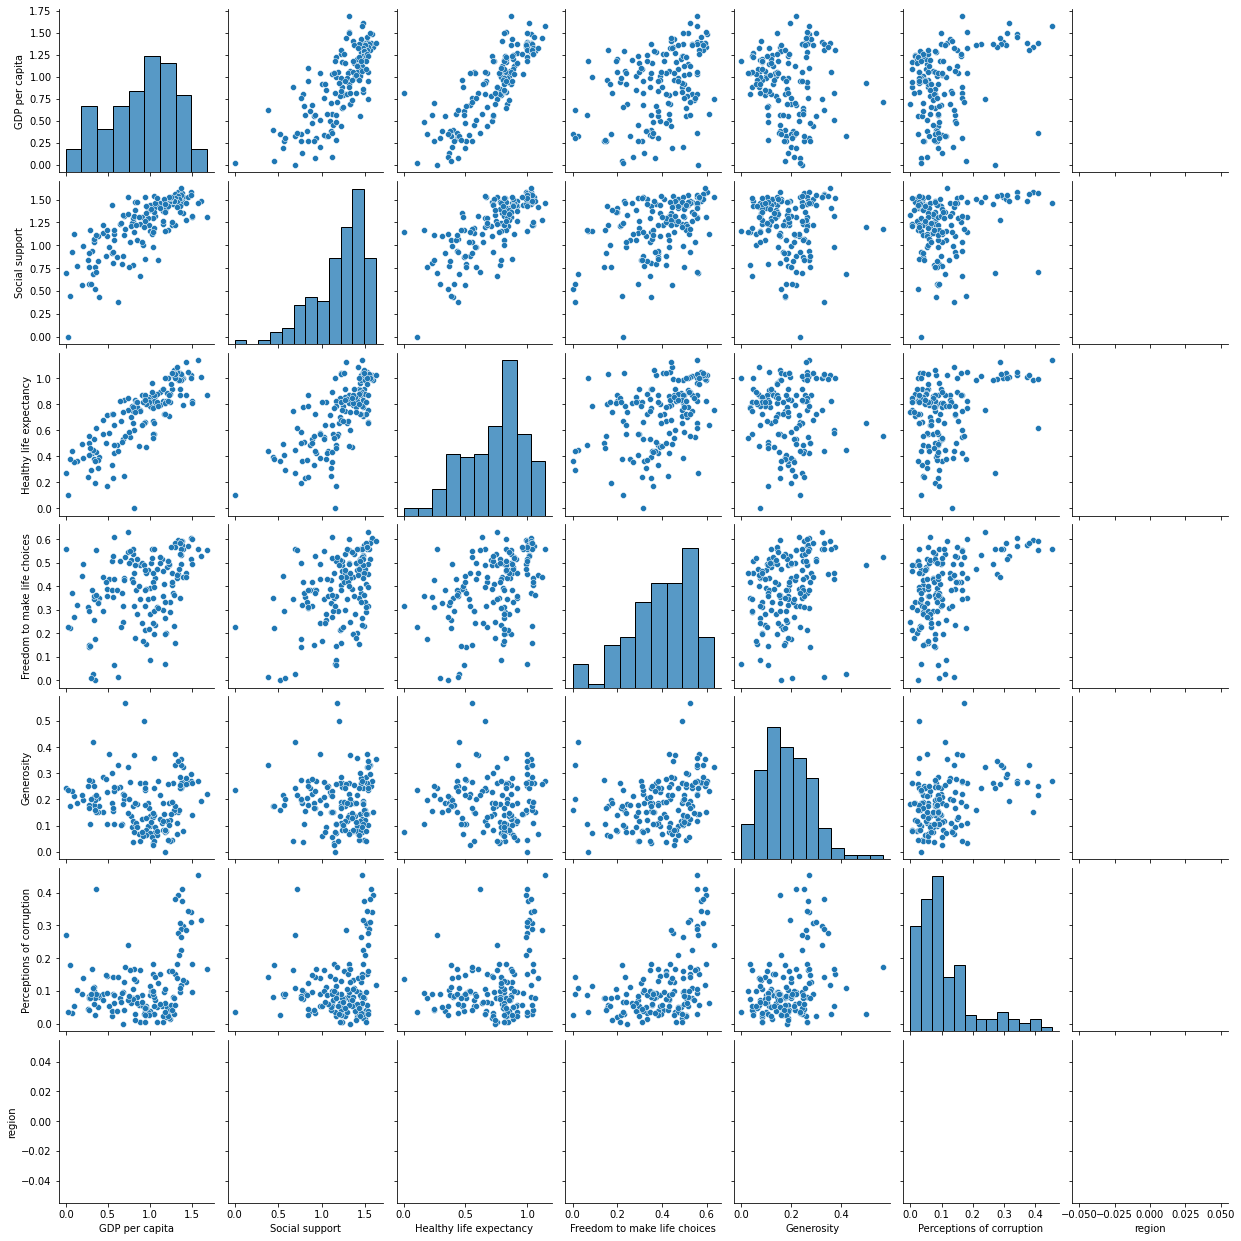

In [ ]:
sns.pairplot(indep_var)

In [ ]:
hap_data.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,region
GDP per capita,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920,NaN
Social support,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899,NaN
Healthy life expectancy,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283,NaN
Freedom to make life choices,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843,NaN
Generosity,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538,NaN
Perceptions of corruption,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000,NaN
region,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Examine features that predict happiness categories using one or more models that allow for automatic feature selection

## pre-process the data

In [ ]:
y = hap_data["Happiness_level"]
X = hap_data.drop(["Happiness_level","Country or region"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# convert to numerical values
# Categorical boolean mask
categorical_cols = X_train.dtypes == object 

numeric_cols = ~categorical_cols 

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                        ('encoder', OneHotEncoder(handle_unknown='ignore'))])

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                   ('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[('categorical', categorical_transformer, categorical_cols),
                               ('numeric', numeric_transformer, numeric_cols)])

X_proc = preprocessor.fit_transform(X_train)

# Number of features after pre-processing

print("feat post pre-processing: ", X_proc.shape[1])


clf = LogisticRegression(penalty='l1', solver = "liblinear") #liblinear -> logistic regression, SVM

clf.fit(X_proc, y_train)

model = SelectFromModel(clf, prefit=True)

X_select_feats = model.transform(X_proc)

# Number of features after automatic feature selection

print("feat post automatic feature selection: ", X_select_feats.shape[1])


feat post pre-processing:  6
feat post automatic feature selection:  6


In [ ]:
y = hap_data["Happiness_level"]
X = hap_data.drop(["Happiness_level","Generosity","Perceptions of corruption",
                   'Country or region',"Social support"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_train.columns.tolist())

(117, 4)
(117,)
['GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'region']


In [ ]:
# Create preprocessing pipelines for both numeric and categorical data.

numeric_features = X.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = []

# Replace missing values with Modal value and then one hot encoding

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Final preprocessor object set up with ColumnTransformer

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit preprocessor object

prediction_input_preprocessor = preprocessor.fit(X_train)

#  3. Build prediction models to try to predict World Happiness

### Model 1: KNN (K Nearest Neighbors)

In [ ]:
m1 = "KNN"

model1 = KNeighborsClassifier()

model1.fit(prediction_input_preprocessor.transform(X_train), y_train)

y_pred = model1.predict(prediction_input_preprocessor.transform(X_test))

m1_f1_score = f1_score(y_test, y_pred,average="macro",zero_division=0)
m1_prec_score = precision_score(y_test, y_pred,average="macro",zero_division=0)

m1_accuracy = metrics.accuracy_score(y_test, y_pred)
m1_cv = np.mean(cross_val_score(model1, prediction_input_preprocessor.transform(X_train), y_train, cv=10))
m1_prediction_accuracy = model1.score(prediction_input_preprocessor.transform(X_test), y_test)

### Model 2: Logistic Regression

In [ ]:
m2 = "Logistic Regression"

model2 = LogisticRegression(C = 1000.0)

model2.fit(prediction_input_preprocessor.transform(X_train), y_train)

y_pred = model2.predict(prediction_input_preprocessor.transform(X_test))

m2_f1_score = f1_score(y_test, y_pred,average="macro",zero_division=0)
m2_prec_score = precision_score(y_test, y_pred,average="macro",zero_division=0)

m2_accuracy = metrics.accuracy_score(y_test, y_pred)
m2_cv = np.mean(cross_val_score(model2, prediction_input_preprocessor.transform(X_train), y_train, cv=10))
m2_prediction_accuracy = model2.score(prediction_input_preprocessor.transform(X_test), y_test)

### Model 3: Random Forest Classifier

In [ ]:
m3 = "Random Forest Classifier"

model3 = RandomForestClassifier(n_estimators=1000, random_state = 0)

model3.fit(prediction_input_preprocessor.transform(X_train), y_train)

y_pred = model3.predict(prediction_input_preprocessor.transform(X_test))

m3_f1_score = f1_score(y_test, y_pred,average="macro",zero_division=0)
m3_prec_score = precision_score(y_test, y_pred,average="macro",zero_division=0)

m3_accuracy = metrics.accuracy_score(y_test, y_pred)
m3_cv = np.mean(cross_val_score(model3, prediction_input_preprocessor.transform(X_train), y_train, cv=10))
m3_prediction_accuracy = model3.score(prediction_input_preprocessor.transform(X_test), y_test)

### Model4: Ridge Classifier

In [ ]:
m4 = "Ridge Classifier"

model4 = RidgeClassifier()

model4.fit(prediction_input_preprocessor.transform(X_train), y_train)

y_pred = model4.predict(prediction_input_preprocessor.transform(X_test))

m4_f1_score = f1_score(y_test, y_pred,average="macro",zero_division=0)
m4_prec_score = precision_score(y_test, y_pred,average="macro",zero_division=0)

m4_accuracy = metrics.accuracy_score(y_test, y_pred)
m4_cv = np.mean(cross_val_score(model4, prediction_input_preprocessor.transform(X_train), y_train, cv=10))
m4_prediction_accuracy = model4.score(prediction_input_preprocessor.transform(X_test), y_test)

### Results of all 4 models

In [ ]:
print("Results for each model")

print("\n ", m1)
print(m1+"'s cross validation accuracy:", m1_cv)
print(m1+"'s Test-Data prediction accuracy:", m1_prediction_accuracy)
print(m1+"'s F1 score:", m1_f1_score)
print(m1+"'s precision score:", m1_prec_score)

print("\n ", m2)
print(m2+"'s cross validation accuracy:", m2_cv)
print(m2+"'s Test-Data prediction accuracy:", m2_prediction_accuracy)
print(m2+"'s F1 score:", m2_f1_score)
print(m2+"'s precision score:", m2_prec_score)

print("\n ", m3)
print(m3+"'s cross validation accuracy:", m3_cv)
print(m3+"'s Test-Data prediction accuracy:", m3_prediction_accuracy)
print(m3+"'s F1 score:", m3_f1_score)
print(m3+"'s precision score:", m3_prec_score)

print("\n ", m4)
print(m4+"'s cross validation accuracy:", m4_cv)
print(m4+"'s Test-Data prediction accuracy:", m4_prediction_accuracy)
print(m4+"'s F1 score:", m4_f1_score)
print(m4+"'s precision score:", m4_prec_score)

Results for each model

  KNN
KNN's cross validation accuracy: 0.4878787878787878
KNN's Test-Data prediction accuracy: 0.46153846153846156
KNN's F1 score: 0.47382617382617376
KNN's precision score: 0.5371428571428571

  Logistic Regression
Logistic Regression's cross validation accuracy: 0.5053030303030303
Logistic Regression's Test-Data prediction accuracy: 0.4358974358974359
Logistic Regression's F1 score: 0.4305882352941176
Logistic Regression's precision score: 0.5321428571428571

  Random Forest Classifier
Random Forest Classifier's cross validation accuracy: 0.5151515151515151
Random Forest Classifier's Test-Data prediction accuracy: 0.4358974358974359
Random Forest Classifier's F1 score: 0.4308241758241758
Random Forest Classifier's precision score: 0.44995670995670994

  Ridge Classifier
Ridge Classifier's cross validation accuracy: 0.42727272727272725
Ridge Classifier's Test-Data prediction accuracy: 0.4358974358974359
Ridge Classifier's F1 score: 0.3835974653365958
Ridge Clas

In [ ]:
# the best model was the Random Forest Classifier.
# this is model number 3, which is then saved as a pickle file 

pickle.dump(model3, open( "rff_model.pkl", "wb" ) )
# use Pickle to save the final data and train it with multiple models, or save the model and test it on multiple data without training the model again. 